<a href="https://colab.research.google.com/github/gardenialionita/PlatinumChallengeBinar/blob/Playground/Platinum_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Standar Library
import re
import string

# Third-party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [35]:
# Read TSV file into DataFrame
data = pd.read_table('https://gist.githubusercontent.com/gardenialionita/0e9d51539fce7bad50ef263f7b643347/raw/49f0786f31cd898da6754242a35f749ff21a3c97/train_preprocess.tsv',  names=["text", "label"])
print(data)


                                                    text     label
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2      lokasi strategis di jalan sumatera bandung . t...  positive
3      betapa bahagia nya diri ini saat unboxing pake...  positive
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative
...                                                  ...       ...
10995                                       tidak kecewa  positive
10996  enak rasa masakan nya apalagi kepiting yang me...  positive
10997        hormati partai-partai yang telah berkoalisi   neutral
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative
10999  meskipun sering belanja ke yogya di riau junct...  positive

[11000 rows x 2 columns]


In [36]:
data.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [40]:
# replacing values
data['label'].replace(['positive', 'neutral','negative'],
                        [1, 0,-1], inplace=True)

In [41]:
data.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1


In [42]:
punctuations = re.sub(r"[!<_>#:)\.]", "", string.punctuation)

def punct2wspace(text):
    return re.sub(r"[{}]+".format(punctuations), " ", text)

def normalize_wspace(text):
    return re.sub(r"\s+", " ", text)

def casefolding(text):
    return text.lower()

In [43]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [44]:
def preprocess_text(text):
    text = punct2wspace(text)
    text = normalize_wspace(text)
    text = casefolding(text)
    # text = stemmer.stem(text)
    return text

In [45]:
data["cleaned_text"] = data["text"].apply(preprocess_text)
data.head()

,text,label,cleaned_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,1,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,1,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,duh jadi mahasiswa jangan sombong dong kasih k...


In [46]:
target = data["label"]
features_text = data["cleaned_text"]

Input Pipeline

In [47]:
#split data
X_train, X_test, y_train, y_test = train_test_split(features_text, target, random_state=42)

In [48]:
#TF Dataset
BATCH_SIZE = 32

In [49]:
# Ubah input menjadi objek tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Terapkan shuffle, batch dan prefetch pada dataset
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [50]:
# Melihat isi dataset
for feat, tar in train_dataset.take(1):
    print(feat[:3])
    print(tar[:3])

tf.Tensor(
[b'setelah beberapa tahun saya tidak pernah menginjak lembang dan beberapa teman rekomendasi dusun bambu maka saya mengajak teman saya yang berkunjung ke bandung lokasi memang cukup jauh dan rute jalan yang sempit namun kami semua merasa senang bisa makan siang dan berisitirahat di dusun bambu lembang memang memiliki keunggulan tersendiri dari udara yang segar dan dingin makanan memang relatif cukup mantap '
 b'restauran alas daun ini adalah pilihan keluarga saya untuk makan siang kenapa selain harga nya yang murah rasanya juga dijamin top ! suasana tempat makan ini setiap saya ku njungi selalu ramai apa lagi kalau liburan pasti daftar tunggu keluarga saya memang paling suka makan makanan khas sunda maklum lidah indonesia hehe kalian bisa memilih menu yang kalian suka '
 b'untuk mendapatkan pemandangan yang bagus dengan cahaya lampu warna warni sebaiknya pada malam hari karena memiliki latar belakang pemandangan kota pasupati fly over yang merupakan ikon nya dari kota bandun

In [51]:
#Text Encoder
max_features = 10000      # Jumlah kosakata
embedding_dim = 16        # Jumlah dimensi dalam word embedding

In [52]:
# Buat text vectorizer
encoder = keras.layers.TextVectorization(max_tokens=max_features)

# Latih tokenizer pada data teks
encoder.adapt(train_dataset.map(lambda feat, tar: feat))
     

In [53]:
# Tokenisasi data teks
encoder(feat)[:3]

<tf.Tensor: shape=(3, 67), dtype=int64, numpy=
array([[ 145,  129,  176,    6,    7,  168, 3978,  339,    4,  129,   60,
         183,  652,  484,  326,    6, 1216,   60,    6,    3,  238,   16,
          23,   78,   79,   24,  169,    4, 2089,   44,    3,  506,  112,
          37,  100,  485,  322,   26,   14,  139,    4,    1,    5,  652,
         484,  339,   79,  257, 2004, 1294,   20,  225,    3,  182,    4,
         224,   10,   79,  372,   24,  138,    0,    0,    0,    0,    0,
           0],
       [1759,  978,  240,   12,   45,   68,   69,    6,   13,   14,  139,
         405,  156,   19,    2,    3,  105,   36,   15,  720,  407,   39,
          11,   14,   12,  228,    6,  263,  937,   98,  131,  141,   55,
          30,  500,  159,  496,  554,   69,    6,   79,  123,   56,   14,
          10,  107,  106, 1887,  312,  114,  602,  323,   26,  251,   22,
           3,  323,   56,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  13,  540,   51,    3,   5

Model Building

In [54]:
# Buat model sequential (berurutan)
model = keras.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(
    input_dim=len(encoder.get_vocabulary()), 
    output_dim=embedding_dim, 
    mask_zero=True)
)
model.add(keras.layers.LSTM(16, return_sequences=True))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Tentukan loss, optimizer dan metrik yang akan digunakan
model.compile(loss="binary_crossentropy", 
              optimizer="rmsprop",
              metrics=["acc"])

Struktur Model

In [55]:

# Melihat arsitektur model
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 lstm (LSTM)                 (None, None, 16)          2112      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                        

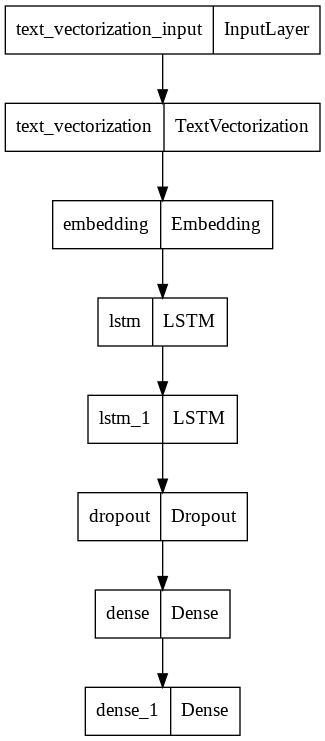

In [56]:
# Melihat Diagram Model
keras.utils.vis_utils.plot_model(model, "model.png")

In [57]:
# Melatih model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
258/258 [==============================] - 22s 60ms/step - loss: -1.8208 - acc: 0.4840 - val_loss: -4.5152 - val_acc: 0.5767
Epoch 2/10
258/258 [==============================] - 13s 51ms/step - loss: -8.6222 - acc: 0.5857 - val_loss: -12.5799 - val_acc: 0.5880
Epoch 3/10
258/258 [==============================] - 13s 51ms/step - loss: -19.0575 - acc: 0.5827 - val_loss: -23.5723 - val_acc: 0.5782
Epoch 4/10
258/258 [==============================] - 14s 54ms/step - loss: -34.1371 - acc: 0.5835 - val_loss: -37.8329 - val_acc: 0.5742
Epoch 5/10
258/258 [==============================] - 13s 51ms/step - loss: -53.2112 - acc: 0.5822 - val_loss: -55.7057 - val_acc: 0.5789
Epoch 6/10
258/258 [==============================] - 13s 50ms/step - loss: -76.9983 - acc: 0.5841 - val_loss: -75.4421 - val_acc: 0.5680
Epoch 7/10
258/258 [==============================] - 13s 50ms/step - loss: -106.3789 - acc: 0.5930 - val_loss: -98.0693 - val_acc: 0.5676
Epoch 8/10
258/258 [================

Model Evaluation

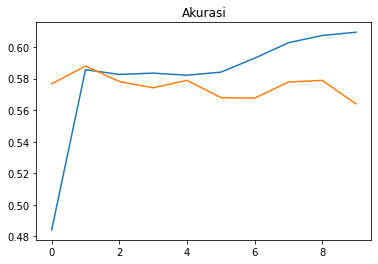

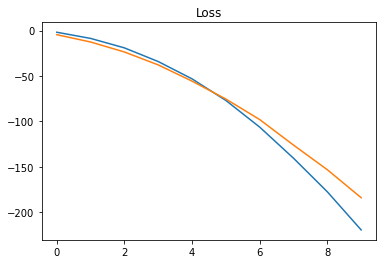

In [58]:
plt.figure()
plt.title("Akurasi")
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.figure()
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

Prediksi Model

In [67]:
contoh_text = ["makanan beragam , harga makanan di food stall akan ditambahkan 10 % lagi di kasir , suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk ."]
prediksi = model.predict(contoh_text) # Probabilitas
prediksi.squeeze()  # diatas 0.5 berarti label 1 atau sentimen positif, begitu juga sebaliknya

1/1 [==============================] - 0s 34ms/step


array(1., dtype=float32)

In [68]:
if prediksi.squeeze()>0.5:
  print(prediksi.squeeze())
  print("Review positif")
else:
  print(prediksi.squeeze())
  print("Review negatif")

1.0
Review positif


In [69]:
model.save_weights('mymodel_weights')
model.save('mymodel',save_format=tf)

In [70]:
tf.keras.models.load_model("mymodel")

In [71]:
contoh_text = ["lokasi strategis pusat kota, nyaman"]
prediksi = model.predict(contoh_text) # Probabilitas
prediksi.squeeze()
if prediksi.squeeze()>0.5:
  print(prediksi.squeeze())
  print("Review positif")
else:
  print(prediksi.squeeze())
  print("Review negatif")
     

1/1 [==============================] - 0s 59ms/step
1.0
Review positif
